#  IN3050/IN4050 Mandatory Assignment 1 - Annica - @annicas : Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 24 2023, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

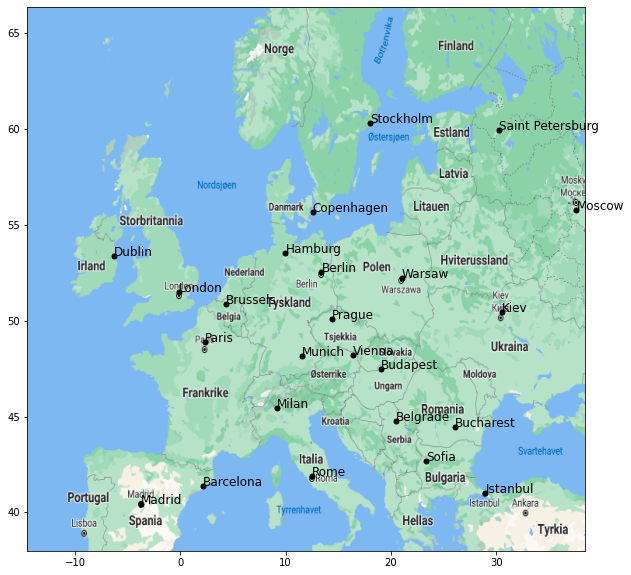

In [3]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [4]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12);
    plt.show();

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


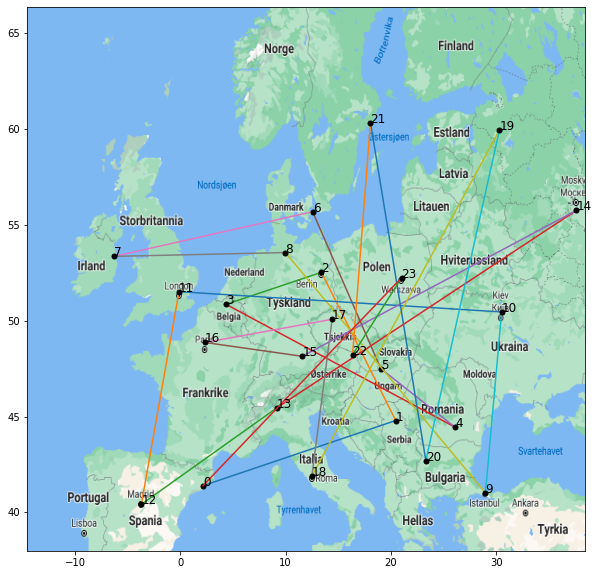

In [5]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

In [6]:
# Implement the algorithm here
import itertools

def exhaustiveSearch(n):
    # Create a dictionary of distances between cities
    distances = {}
    for i in range(n):
        for j in range (n):
            # Only calculate distance between different cities
            if cities[i] != cities[j]:
                distances[(cities[i], cities[j])] = data[i+1][j]

    # Get a list of all permutations of n cities
    nCities = cities[:n]
    combs = list(itertools.permutations(nCities))

    # Set initial values for shortest distance and shortest path
    shortest = float("inf")
    shortestPath = None

    # Loop through each possible path and calculate the total distance    shortest = float("inf")
    shortestPath = None
    for path in combs:
        dist = 0
        for i in range(n-1):
            city = path[i]
            city2 = path[i+1]
            dist += float(distances[(city, city2)])
            if dist > shortest:
                # Stop calculating the distance if it's already longer than the current shortest
                break
        # Add the distance from the last city to the first city to complete the path
        dist += float(distances[(city2, path[0])])
        # Update the shortest path and distance if this is shorter
        if dist < shortest:
            shortest = dist
            shortestPath = path
    return shortestPath, shortest


What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

Executed time for Exhaustive search:  13.6096
The shortest tour found :  ('Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin') with distance  7486.3100


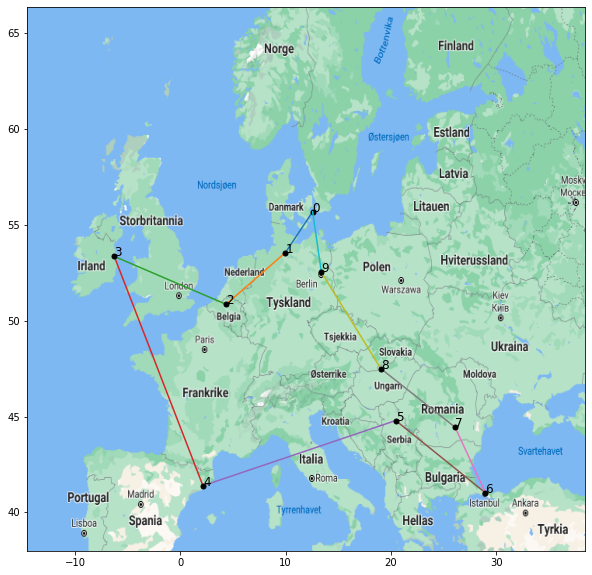

In [7]:
# Answer
import time

start = time.time()
path, distance = exhaustiveSearch(10)
end = time.time()
ES_time = end - start
print("Executed time for Exhaustive search: ",  "{:.4f}".format(ES_time))

print("The shortest tour found : ", path, "with distance ", "{:.4f}".format(distance))
plot_plan(path)

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

HILL-CLIMBING FOR 10 CITIES
Executed time for 20 runs of the hill climbing method:  0.0000000000
Compared to Exhaustive Search, this method performed 13.6096 s better!

The plot shows the best tour of the 20 runs:  8423.8000 
With path :  ['Copenhagen', 'Berlin', 'Bucharest', 'Belgrade', 'Istanbul', 'Budapest', 'Dublin', 'Barcelona', 'Brussels', 'Hamburg']


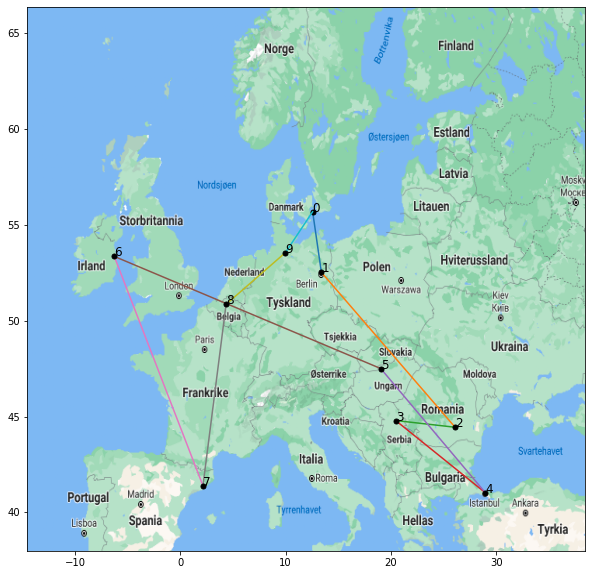

The worst path of the 20 runs had a distance of :  14248.8800
The mean:  11682.4030
The standard deviation:  1631.0678

HILL-CLIMBING FOR 24 CITIES
Executed time for 20 runs of the hill climbing method:  0.0000000000
Compared to Exhaustive Search, this method performed 13.6096 s better!

The plot shows the best tour of the 20 runs:  27290.9000 
With path :  ['Stockholm', 'Barcelona', 'Milan', 'Istanbul', 'Vienna', 'Berlin', 'Saint Petersburg', 'Copenhagen', 'Hamburg', 'Dublin', 'Paris', 'Rome', 'Moscow', 'Budapest', 'Kiev', 'Prague', 'Bucharest', 'Brussels', 'Belgrade', 'Sofia', 'Munich', 'Madrid', 'London', 'Warsaw']


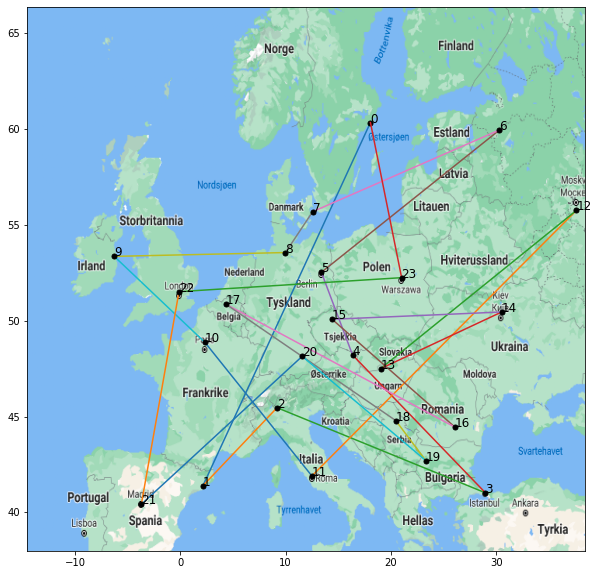

The worst path of the 20 runs had a distance of :  33824.1400
The mean:  29989.7300
The standard deviation:  1814.5844


In [8]:
# Implement the algorithm here
import random
# Collecting distances in dict
distances = {}
for i in range(24):
    for j in range (24):
        if cities[i] != cities[j]:
            distances[(cities[i], cities[j])] = data[i+1][j]

# Method for calculating dist (also used in part3)
def get_distance(path, n=24, best = float("inf")):
        dist = 0
        for i in range(n-1):
            city = path[i]
            city2 = path[i+1]
            dist += float(distances[(city, city2)])
            if dist > best:
                return              # quits when path is worse
        dist += float(distances[(city2, path[0])])
        return dist

# This function returns the best tour and its distance 
# for a given number of cities n
def hill_climbing(n):
    nCities = cities[:n]        # global list
    
    # Swap 2 neighboring cities in given neighbor path
    def find_neighbor(nb):
        i = random.randint(0,n-2)
        j = i + 1
        nb[i], nb[j] = nb[j], nb[i]
        return nb

    best_tour = nCities
    random.shuffle(best_tour)
    best = get_distance(best_tour, n)
    nb_path = best_tour  
    visited_neighbors = []

    i = 0
    while(i < 1000000):  #avoid infinite loops
        nb = find_neighbor(nb_path)
        # Avoid the visited neighbors
        if not nb_path in visited_neighbors:
            visited_neighbors.append(nb_path[:])    #adding copy
            nb_dist = get_distance(nb_path, n, best)

            #  Update best path if better
            if nb_dist != None:     
                best = nb_dist
                best_tour = nb_path
            else:
                break           #if new path is not better
        i += 1
    
    return best_tour, best

print("HILL-CLIMBING FOR 10 CITIES")
start = time.time()
all_tours = {}
for i in range(20):
    tour, tour_d = hill_climbing(10)
    all_tours[tour_d] = tour
end = time.time()
HC_time = end - start

print("Executed time for 20 runs of the hill climbing method: ", "{:.10f}".format(HC_time))
print("Compared to Exhaustive Search, this method performed" , "\033[1m{:.4f}\033[0m".format(ES_time - HC_time), "s better!")


keys = all_tours.keys()
best, worst, avg, std = min(keys), max(keys), sum(keys)/len(keys), np.std(list(keys))
best_tour = all_tours.get(best)
print("\nThe plot shows the best tour of the 20 runs: ", "{:.4f}".format(best), "\nWith path : ", best_tour)
plot_plan(best_tour)

print("The worst path of the 20 runs had a distance of : ", "{:.4f}".format(worst))
print("The mean: ", "{:.4f}".format(avg))
print("The standard deviation: ", "{:.4f}".format(std))

print("\nHILL-CLIMBING FOR 24 CITIES")
start = time.time()
all_tours = {}
for i in range(20):
    tour, tour_d = hill_climbing(24)
    all_tours[tour_d] = tour
end = time.time()
HC_time = end - start

print("Executed time for 20 runs of the hill climbing method: ", "{:.10f}".format(HC_time))
print("Compared to Exhaustive Search, this method performed" , "\033[1m{:.4f}\033[0m".format(ES_time - HC_time), "s better!")


keys = all_tours.keys()
best, worst, avg, std = min(keys), max(keys), sum(keys)/len(keys), np.std(list(keys))
best_tour = all_tours.get(best)
print("\nThe plot shows the best tour of the 20 runs: ", "{:.4f}".format(best), "\nWith path : ", best_tour)
plot_plan(best_tour)

print("The worst path of the 20 runs had a distance of : ", "{:.4f}".format(worst))
print("The mean: ", "{:.4f}".format(avg))
print("The standard deviation: ", "{:.4f}".format(std))



## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.


The evolutionary algorithm for population size 100 was performed in  7.67 s.
The best solution gives:  12534.08
The worst solution gives:  16266.92
The mean of the best solutions gives:  12800.653
The standard deviation of the best solutions gives:  667.631

The evolutionary algorithm for population size 300 was performed in  24.497 s.
The best solution gives:  12287.07
The worst solution gives:  15427.86
The mean of the best solutions gives:  12473.98
The standard deviation of the best solutions gives:  302.56

The evolutionary algorithm for population size 500 was performed in  49.341 s.
The best solution gives:  12325.93
The worst solution gives:  14393.87
The mean of the best solutions gives:  12389.336
The standard deviation of the best solutions gives:  41.509


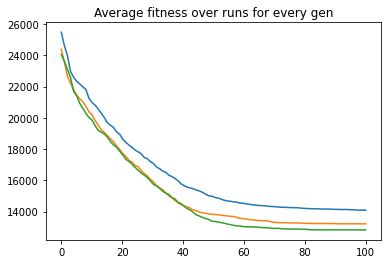

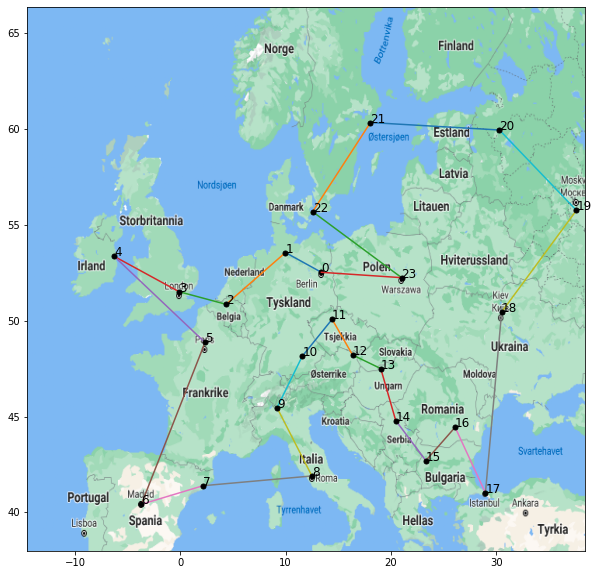

This is the best solution for  1 . test with path:  ['Berlin', 'Hamburg', 'Brussels', 'London', 'Dublin', 'Paris', 'Madrid', 'Barcelona', 'Rome', 'Milan', 'Munich', 'Prague', 'Vienna', 'Budapest', 'Belgrade', 'Sofia', 'Bucharest', 'Istanbul', 'Kiev', 'Moscow', 'Saint Petersburg', 'Stockholm', 'Copenhagen', 'Warsaw']


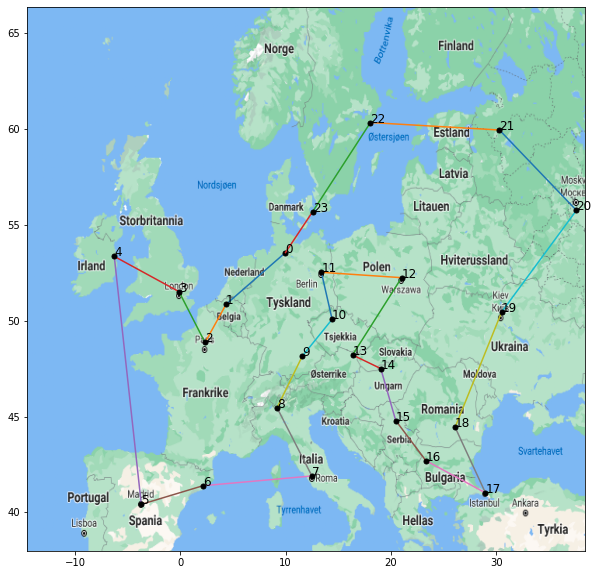

This is the best solution for  2 . test with path:  ['Hamburg', 'Brussels', 'Paris', 'London', 'Dublin', 'Madrid', 'Barcelona', 'Rome', 'Milan', 'Munich', 'Prague', 'Berlin', 'Warsaw', 'Vienna', 'Budapest', 'Belgrade', 'Sofia', 'Istanbul', 'Bucharest', 'Kiev', 'Moscow', 'Saint Petersburg', 'Stockholm', 'Copenhagen']


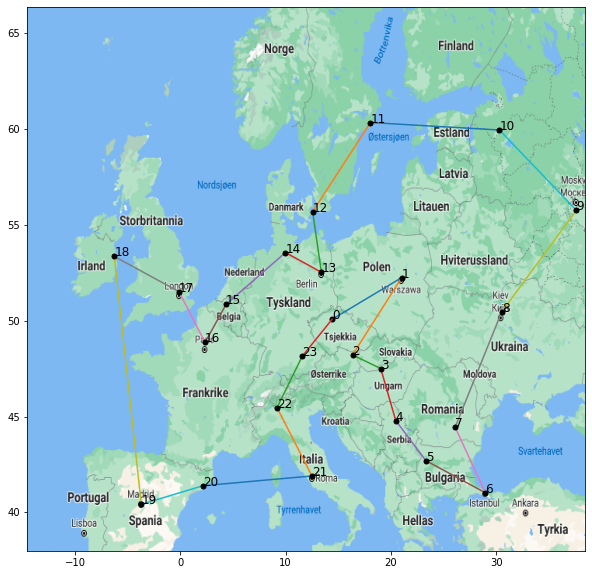

This is the best solution for  3 . test with path:  ['Prague', 'Warsaw', 'Vienna', 'Budapest', 'Belgrade', 'Sofia', 'Istanbul', 'Bucharest', 'Kiev', 'Moscow', 'Saint Petersburg', 'Stockholm', 'Copenhagen', 'Berlin', 'Hamburg', 'Brussels', 'Paris', 'London', 'Dublin', 'Madrid', 'Barcelona', 'Rome', 'Milan', 'Munich']
Conclusion: The best of them all is the test with size 300, because the best solution isn't much different from size 500.
Even though it finds a slightly better solution, it is at the expense of performing time.
At an attempt on size 600 and additional 10s, it also didn't yield a significant improvement


In [9]:
# Implement the algorithm here

from collections import OrderedDict

def pmx_pair(p1, p2):
    l = len(p1)
    # choose segment
    left = random.randint(0,len(p1))
    right = random.randint(0,len(p1))
    if left > right:
        left, right = right, left

    # Initialize children with only the segments
    c1 = [None] * l
    c1[left:right] = p2[left:right]
    c2 = [None] * l
    c2[left:right] = p1[left:right]

    # Loop through parent 1
    for i in range(len(p1)):
        if not c1[i]:      # if the value is not yet assigned to the child 1
            j = p1[i]       
            idx = None
            while j in c1:         # if the value is already in the child 1
                idx = c1.index(j)
                j = c2[idx]         # find the corresponding value from child 2
            c1[i] = j

    # Doing the same for parent 2 with child 2
    for i in range(len(p2)):    
        if not c2[i]:      
            j = p2[i] 
            idx = None
            while j in c2:         
                idx = c2.index(j)
                j = c1[idx]
            c2[i] = j
            
    return c1, c2

# Method for finding children with pmx
# returns a list of parents and children
def find_offsprings(sols):
    for i in range(0, len(sols), 2):
        child1, child2 = pmx_pair(sols[i], sols[i+1])
        if child1 not in sols:
            sols.append(child1)
        if child2 not in sols:
            sols.append(child2)
    return sols


def genetic(n, p, MAX, plotY):
    solutions = []
    lst = cities[:n].copy()
    # Initialization of n parents by random shuffling
    for i in range(p):         
        random.shuffle(lst)
        solutions.append(lst[:])

    # Starting recombination for given generations
    gen = 0
    while (gen < MAX):
        solutions = find_offsprings(solutions)

        shortest_paths = sorted(solutions, key=lambda i: get_distance(i, n))   # sorts by distance
        solutions = shortest_paths[:p]      # keep n best from this gen
        
        best_path = solutions[0]
        best = get_distance(best_path, n)

        plotY[gen] += best         # adds the best distance to the plot data
        gen += 1

    worst = get_distance(solutions[-1], n)
    return plotY, (best, best_path), worst      # saves the best solution in tuple

# Running EA on n parents for certain generations
def runEA(n, p, gens):
    start = time.time()
    plotY = [0] * gens
    best_sols = []
    best, worst = (float("inf"), None), 0

    # Run 20 times
    for i in range(20):
        plotY, b, w = genetic(n, p, gens, plotY)
        # Find the best & worst
        if min(best[0], b[0]) == b[0]:
            best = b
        best_sols.append(best[0])
        worst = max(worst, w)

    # Finds the average fitness over 20 runs
    plotY = np.array(plotY)/20
    end = time.time()

    print("\nThe evolutionary algorithm for population size", p, "was performed in ", round(end - start, 3), "s.")
    print("The best solution gives: ", round((best[0]), 3))
    print("The worst solution gives: ", round((worst), 3))    
    print("The mean of the best solutions gives: ", round((np.mean(best_sols)), 3))
    print("The standard deviation of the best solutions gives: ", round((np.std(best_sols)), 3))
    return plotY, best[1]      #returns the datapoints and the best path

gens = 100
pops = [100, 300, 500]
plt.title("Average fitness over runs for every gen")
plotX = np.linspace(0, gens, gens)      # x-axis

# Running EA for 24 cities on every population size
for i in range(len(pops)):
    plotY, best = runEA(24, pops[i], gens)
    pops[i] = best
    plt.plot(plotX, plotY)

# Showing plots of best solution of every population
for i in range(len(pops)):
    plot_plan(pops[i])
    print("This is the best solution for ", i+1, ". test with path: ", pops[i])

print("Conclusion: The best of them all is the test with size 300, because the best solution isn't much different from size 500.")
print("Even though it finds a slightly better solution, it is at the expense of performing time.")
print("At an attempt on size 600 and additional 10s, it also didn't yield a significant improvement")



Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?


The evolutionary algorithm for population size 100 was performed in  3.486 s.
The best solution gives:  7486.31
The worst solution gives:  8022.57
The mean of the best solutions gives:  7486.31
The standard deviation of the best solutions gives:  0.0

The evolutionary algorithm for population size 300 was performed in  15.644 s.
The best solution gives:  7486.31
The worst solution gives:  8050.72
The mean of the best solutions gives:  7486.31
The standard deviation of the best solutions gives:  0.0

The evolutionary algorithm for population size 500 was performed in  35.126 s.
The best solution gives:  7486.31
The worst solution gives:  8096.78
The mean of the best solutions gives:  7486.31
The standard deviation of the best solutions gives:  0.0
[8324.83   8176.017  8031.443  7853.63   7761.1555 7687.2205 7628.864
 7584.9475 7568.5125 7562.666  7553.6675 7538.5225 7519.963  7506.8065
 7497.8175 7491.971  7487.989  7487.989  7487.1495 7487.1495 7487.1495
 7486.31   7486.31   7486.31  

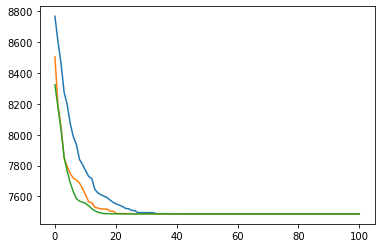

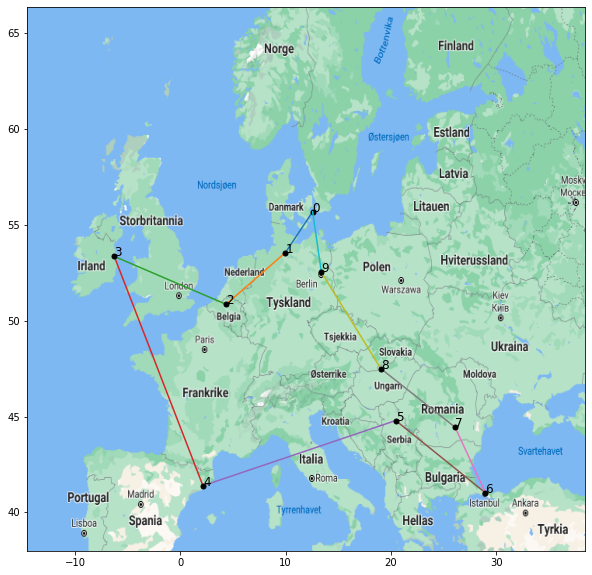

This is the best solution for  1 . test with path:  ['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin']


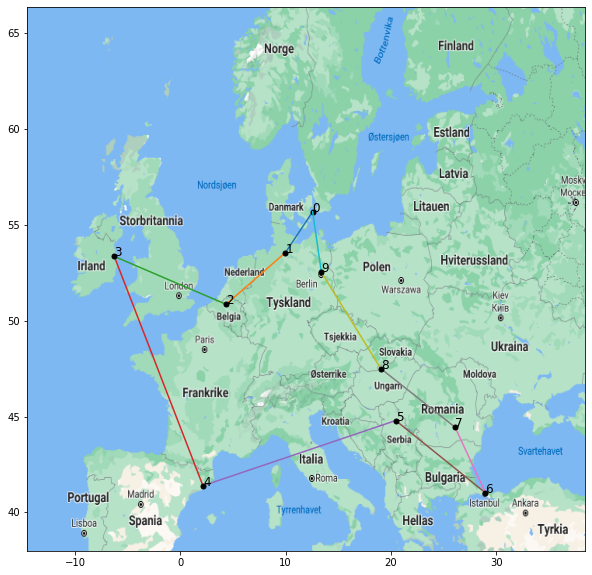

This is the best solution for  2 . test with path:  ['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin']


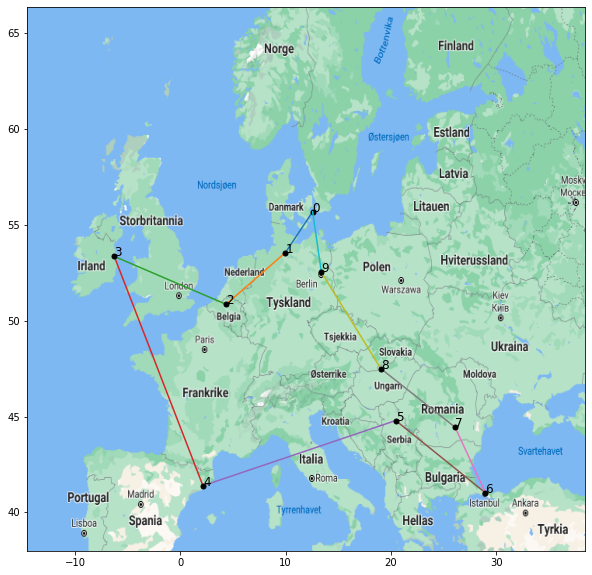

This is the best solution for  3 . test with path:  ['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin']
My GA found the shortest tour for 10 cities with exact same distance.
For 10 cities, the exhaustive search did better than mine with the population size 500,
 but size 100 was more than good enough to find the best solution.
The performing time was only 3s, 13s better!
For 24 cities, the result always varied for everytime I tried running it. Therefore exhaustive search would have found the best solution
at first attempt, but at the expense of a lot more time. Hence GA is much more effective, but not always optimal to find the best solution.


In [10]:
# Answer
# Running EA for 10 cities on every population size
pops = [100, 300, 500]
for i in range(len(pops)):
    plotY, best = runEA(10, pops[i], gens)
    pops[i] = best
    plt.plot(plotX, plotY)
print(plotY)
# Showing plots of best solution of every population
for i in range(len(pops)):
    plot_plan(pops[i])
    print("This is the best solution for ", i+1, ". test with path: ", pops[i])

print("My GA found the shortest tour for 10 cities with exact same distance.")
print("For 10 cities, the exhaustive search did better than mine with the population size 500,\n but size 100 was more than good enough to find the best solution.")
print("The performing time was only 3s, 13s better!")
print("For 24 cities, the result always varied for everytime I tried running it. Therefore exhaustive search would have found the best solution")
print("at first attempt, but at the expense of a lot more time. Hence GA is much more effective, but not always optimal to find the best solution.")




## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [11]:
# Implement algorithm here